In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
# !pip install seaborn
import seaborn as sns

# !pip install graphviz
import graphviz
# !pip install pydotplus
import pydotplus
import io
from scipy import misc

 # Spotify Song Attributes EDA
- import data
- eda to visualize data
- train classifier
- predict target

In [2]:
data = pd.read_csv('spotify-data.csv')

In [3]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [4]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [6]:
train, test = train_test_split(data, test_size = 0.15)

In [7]:
print("Training size: {}; Test size: {}".format(len(train), len(test)))

Training size: 1714; Test size: 303


In [8]:
# colors
red_blue = ["#195B5E", "#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

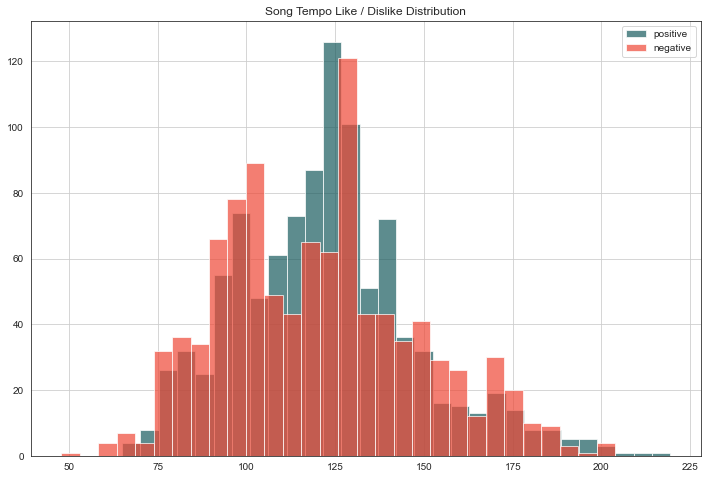

In [9]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']

pos_dance = data[data['target'] == 1]['danceability']
neg_dance = data[data['target'] == 0]['danceability']
pos_duration = data[data['target'] == 1]['duration_ms']
neg_duration = data[data['target'] == 0]['duration_ms']
pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']
pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']
pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']
pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']
pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness']
pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']
pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']

fig = plt.figure(figsize=(12,8))
plt.title("Song Tempo Like / Dislike Distribution")

pos_tempo.hist(alpha=0.7, bins=30, label='positive') # 30 bins
neg_tempo.hist(alpha=0.7, bins=30, label='negative')
plt.legend(loc = 'upper right')

<ipython-input-10-4fb64f0f5422>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = fig2.add_subplot(331)


<AxesSubplot:title={'center':'Song Danceability Like Distribution'}, xlabel='Danceability', ylabel='Count'>

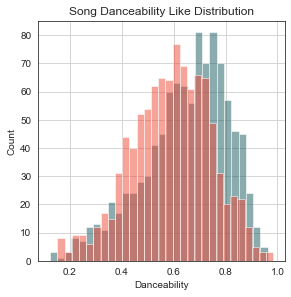

In [10]:
fig2 = plt.figure(figsize=(15,15))

#Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like Distribution')

# target is 1 for all danceability values
pos_dance.hist(alpha = 0.5, bins = 30)

ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha = 0.5, bins = 30)

In [11]:
# training set is 1700 values so 100 is ok. if we did 2 it would be overfit
c = DecisionTreeClassifier(min_samples_split=100)

In [12]:
features = ['acousticness', 'danceability', 'loudness', 'valence', 'energy', 'instrumentalness', 'key', 'speechiness']

In [13]:
X_train = train[features]
y_train = train['target']

X_test = test[features]
y_test = test['target']

In [14]:
y_test

1368    0
1861    0
996     1
336     1
416     1
       ..
953     1
411     1
630     1
1937    0
1360    0
Name: target, Length: 303, dtype: int64

In [15]:
# DT
dt = c.fit(X_train, y_train)

In [16]:

def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20, 20)
    plt.imshow(img)

In [17]:
show_tree(dt, features, 'dec_tree_01.png')

AttributeError: module 'scipy.misc' has no attribute 'imread'